<a href="https://colab.research.google.com/github/ssawant/TensorFlow-in-Practice/blob/main/C2W2_Convolutional_Neural_Network_3_Horse_vs_Human_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

import os, zipfile

local_zip ='/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/human')

--2020-12-22 15:25:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 2607:f8b0:400e:c09::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   156MB/s    in 0.9s    

2020-12-22 15:25:12 (156 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-12-22 15:25:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3),activation=tf.nn.relu, input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
                                    ])

In [4]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=1e-4), loss=tf.losses.binary_crossentropy, metrics=['accuracy'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [6]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=20,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
8/8 [==============================] - 27s 2s/step - loss: 0.6919 - accuracy: 0.5577 - val_loss: 0.6750 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 21s 3s/step - loss: 0.6768 - accuracy: 0.6117 - val_loss: 0.6387 - val_accuracy: 0.7852
Epoch 3/20
8/8 [==============================] - 24s 3s/step - loss: 0.6231 - accuracy: 0.6989 - val_loss: 0.6107 - val_accuracy: 0.7773
Epoch 4/20
8/8 [==============================] - 24s 3s/step - loss: 0.5974 - accuracy: 0.6884 - val_loss: 0.5687 - val_accuracy: 0.5977
Epoch 5/20
8/8 [==============================] - 21s 3s/step - loss: 0.5431 - accuracy: 0.7202 - val_loss: 0.7774 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 21s 3s/step - loss: 0.5210 - accuracy: 0.7315 - val_loss: 0.6809 - val_accuracy: 0.5195
Epoch 7/20
8/8 [==============================] - 21s 3s/step - loss: 0.5450 - accuracy: 0.7300 - val_loss: 0.7158 - val_accuracy: 0.5195
Epoch 8/20
8/8 [==================

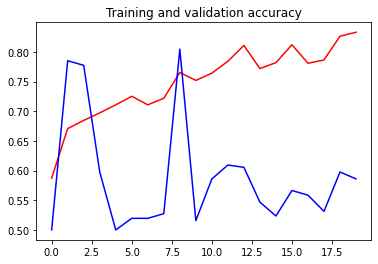

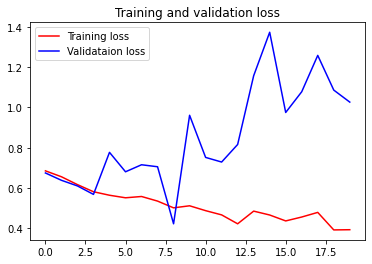

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validataion loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = file.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_image(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")